In [1]:
%matplotlib

Using matplotlib backend: MacOSX


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# import weather data
weather_file = pd.read_csv("weather2018.csv")
weather_file = weather_file.rename(columns={"DATE": "Date",
                                            "AWND": "Average Wind Speed",
                                            "PRCP": "Precipitation",
                                            "SNOW": "Snow",
                                            "TAVG": "Average Temperate"})
weather_file.head()

,STATION,NAME,Date,Average Wind Speed,Precipitation,Snow,Average Temperate
0,USW00014739,"BOSTON, MA US",2018-01-01,16.33,0.00,0.0,6
1,USW00014739,"BOSTON, MA US",2018-01-02,12.75,0.00,0.0,10
2,USW00014739,"BOSTON, MA US",2018-01-03,9.40,0.00,0.0,21
3,USW00014739,"BOSTON, MA US",2018-01-04,22.59,1.35,13.4,26
4,USW00014739,"BOSTON, MA US",2018-01-05,24.83,0.00,0.0,18


In [4]:
# import OTP data
OTP_file1 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_01_Feb.csv")
OTP_file2 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_02_Mar.csv")
OTP_file3 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_03_Apr.csv")
OTP_file4 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_04_May.csv")
OTP_file5 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_05_Jun.csv")
OTP_file6 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_06_Jul.csv")
OTP_file7 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_07_Aug.csv")
OTP_file8 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_08_Sep.csv")
OTP_file9 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_09_Oct.csv")
OTP_file10 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_10_Nov.csv")
OTP_file11 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_11_Dec.csv")
OTP_file12 = pd.read_csv("OTP2018/Ontime_Performance_Peak_Offpeak_2018_12_Jan.csv")

In [5]:
#Merge all the OTP together
total_OTP=OTP_file1.append(OTP_file1)
total_OTP=total_OTP.append(OTP_file2)
total_OTP=total_OTP.append(OTP_file3)
total_OTP=total_OTP.append(OTP_file4)
total_OTP=total_OTP.append(OTP_file5)
total_OTP=total_OTP.append(OTP_file6)
total_OTP=total_OTP.append(OTP_file7)
total_OTP=total_OTP.append(OTP_file8)
total_OTP=total_OTP.append(OTP_file9)
total_OTP=total_OTP.append(OTP_file10)
total_OTP=total_OTP.append(OTP_file11)
total_OTP=total_OTP.append(OTP_file12)
total_OTP.head()

,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,service_date,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator
0,Red,NaN,Red Line,Rapid Transit,Red Line,Rail,2018-01-01,OFF_PEAK,Passenger Wait Time,88683.844569,100599.137204,NaN
1,Red,NaN,Red Line,Rapid Transit,Red Line,Rail,2018-01-01,PEAK,Passenger Wait Time,69497.153843,76869.315426,NaN
2,Orange,NaN,Orange Line,Rapid Transit,Orange Line,Rail,2018-01-01,PEAK,Passenger Wait Time,60556.385998,69294.408306,NaN
3,Orange,NaN,Orange Line,Rapid Transit,Orange Line,Rail,2018-01-01,OFF_PEAK,Passenger Wait Time,85650.233129,94764.733665,NaN
4,Green-B,B,Green Line B,Rapid Transit,Green Line,Rail,2018-01-01,PEAK,Passenger Wait Time,6903.963093,9085.190096,NaN


In [6]:
#clean OTP data
#cleaned_data = merge_Jan.sort_values(by='AWND', ascending=False)

del total_OTP ['cancelled_numerator']
del total_OTP ['metric_type']
del total_OTP ['gtfs_route_desc']
del total_OTP ['peak_offpeak_ind']
del total_OTP ['route_category']
del total_OTP ['gtfs_route_short_name']
del total_OTP ['gtfs_route_long_name']

total_OTP.head()

,gtfs_route_id,mode_type,service_date,otp_numerator,otp_denominator
0,Red,Rail,2018-01-01,88683.844569,100599.137204
1,Red,Rail,2018-01-01,69497.153843,76869.315426
2,Orange,Rail,2018-01-01,60556.385998,69294.408306
3,Orange,Rail,2018-01-01,85650.233129,94764.733665
4,Green-B,Rail,2018-01-01,6903.963093,9085.190096


In [7]:
#calculate and create Accuracy data
daily_ac =total_OTP["otp_numerator"] /total_OTP["otp_denominator"]
total_OTP['OTP Accuracy'] =daily_ac

#change column name
total_OTP =total_OTP.rename(columns={"gtfs_route_id":"Route ID", "mode_type":"Mode Type", "service_date":"Date",
                                     "otp_numerator":"On Time Ride","otp_denominator":"Total Ride"})


total_OTP.head()

,Route ID,Mode Type,Date,On Time Ride,Total Ride,OTP Accuracy
0,Red,Rail,2018-01-01,88683.844569,100599.137204,0.881557
1,Red,Rail,2018-01-01,69497.153843,76869.315426,0.904095
2,Orange,Rail,2018-01-01,60556.385998,69294.408306,0.873900
3,Orange,Rail,2018-01-01,85650.233129,94764.733665,0.903820
4,Green-B,Rail,2018-01-01,6903.963093,9085.190096,0.759914


In [8]:
#groupby data to find the daily accuracy
groupedby_date= total_OTP.groupby(['Date'])
daily_ac=groupedby_date["On Time Ride"].sum() / groupedby_date["Total Ride"].sum()

daily_ac.sort_values(ascending=False)


Date
2018-12-25    0.912530
2018-04-01    0.894005
2018-06-03    0.892584
2018-12-30    0.892211
2018-12-28    0.889346
                ...   
2018-10-09    0.738468
2018-09-03    0.736886
2018-10-13    0.735197
2018-03-13    0.726853
2018-01-05    0.717746
Length: 365, dtype: float64

In [9]:
#merge OTP with weather data
merge_OW= pd.merge(total_OTP,weather_file,on="Date",how="outer")
merge_OW.head()

,Route ID,Mode Type,Date,On Time Ride,Total Ride,OTP Accuracy,STATION,NAME,Average Wind Speed,Precipitation,Snow,Average Temperate
0,Red,Rail,2018-01-01,88683.844569,100599.137204,0.881557,USW00014739,"BOSTON, MA US",16.33,0.0,0.0,6
1,Red,Rail,2018-01-01,69497.153843,76869.315426,0.904095,USW00014739,"BOSTON, MA US",16.33,0.0,0.0,6
2,Orange,Rail,2018-01-01,60556.385998,69294.408306,0.873900,USW00014739,"BOSTON, MA US",16.33,0.0,0.0,6
3,Orange,Rail,2018-01-01,85650.233129,94764.733665,0.903820,USW00014739,"BOSTON, MA US",16.33,0.0,0.0,6
4,Green-B,Rail,2018-01-01,6903.963093,9085.190096,0.759914,USW00014739,"BOSTON, MA US",16.33,0.0,0.0,6


In [10]:
groupedby_datee = merge_OW.groupby(['Date'])
new_df = pd.DataFrame( {
        'Daily Accuracy': daily_ac,
        'Wind Speed':groupedby_datee['Average Wind Speed'].mean(),
        'Precipitation':groupedby_datee['Precipitation'].mean(),
        'Snow':groupedby_datee['Snow'].mean(),
        'Temperate':groupedby_datee['Average Temperate'].mean()
           })

new_df.head()

,Daily Accuracy,Wind Speed,Precipitation,Snow,Temperate
Date,,,,,
2018-01-01,0.851551,16.33,0.00,0.0,6
2018-01-02,0.859716,12.75,0.00,0.0,10
2018-01-03,0.831629,9.40,0.00,0.0,21
2018-01-04,0.762104,22.59,1.35,13.4,26
2018-01-05,0.717746,24.83,0.00,0.0,18


In [11]:
#sort accuracy
new_df =new_df.sort_values("Daily Accuracy",ascending=False)
new_df

,Daily Accuracy,Wind Speed,Precipitation,Snow,Temperate
Date,,,,,
2018-12-25,0.912530,10.74,0.00,0.0,36
2018-04-01,0.894005,17.90,0.00,0.0,48
2018-06-03,0.892584,13.20,0.00,0.0,58
2018-12-30,0.892211,6.26,0.00,0.0,32
2018-12-28,0.889346,11.41,0.33,0.0,41
...,...,...,...,...,...
2018-10-09,0.738468,12.30,0.00,0.0,67
2018-09-03,0.736886,10.51,0.00,0.0,81
2018-10-13,0.735197,9.40,0.13,0.0,52


In [12]:
#cesur is working on this!!!!

In [13]:
#use for loop merge ridership
total_rider = ['Weekday_Ridership_2018_01_Jan.csv',
               'Weekday_Ridership_2018_02_Feb.csv',
        'Weekday_Ridership_2018_03_Mar.csv','Weekday_Ridership_2018_04_Apr.csv',
        'Weekday_Ridership_2018_05_May.csv','Weekday_Ridership_2018_06_Jun.csv',
        'Weekday_Ridership_2018_07_Jul.csv','Weekday_Ridership_2018_08_Aug.csv',
        'Weekday_Ridership_2018_09_Sep.csv','Weekday_Ridership_2018_10_Oct.csv',
        'Weekday_Ridership_2018_11_Nov.csv','Weekday_Ridership_2018_12_Dec.csv',]
ridership_df = pd.DataFrame({})
for file in total_rider:
    tmp = pd.read_csv('Weekday_Ridership_2018/' + file)
    ridership_df = ridership_df.append(tmp)
    
#column change
ridership_df = ridership_df.rename(columns={"date":"Date","MODE":"Mode",
                                            "RIDERSHIP":"Ridership",
                                            "ROUTE_OR_LINE":"Route"})

#column del
del ridership_df["COUNTOFDATES"]
del ridership_df["AVG_RIDERSHIP"]

#correct dtype
ridership_df['Date'] = ridership_df['Date'].astype('datetime64[ns]')
ridership_df['Date'] = pd.to_datetime(ridership_df['Date'])
#create a conditional column
ridership_df['Season'] =np.where((ridership_df['Date'] > '2018-05-01')& (ridership_df['Date'] <= '2018-08-01'),'Summer',
                                  np.where((ridership_df['Date'] > '2018-08-01')& (ridership_df['Date'] <= '2018-11-01'),'Fall', 
                                           np.where((ridership_df['Date'] > '2018-11-01') | (ridership_df['Date'] <= '2018-02-01'),'Winter',
                                                    'Spring')))
ridership_df

,Date,Mode,Ridership,Route,Season
0,2018-01-01,Bus,6.788939e+06,Bus,Winter
1,2018-01-01,Bus,6.351820e+05,Silver Line,Winter
2,2018-01-01,Rail,1.323204e+06,Blue Line,Winter
3,2018-01-01,Rail,3.141136e+06,Green Line,Winter
4,2018-01-01,Rail,3.987313e+06,Orange Line,Winter
...,...,...,...,...,...
1,2018-12-01,Bus,6.716490e+05,Silver Line,Winter
2,2018-12-01,Rail,1.303504e+06,Blue Line,Winter
3,2018-12-01,Rail,2.791420e+06,Green Line,Winter
4,2018-12-01,Rail,3.687113e+06,Orange Line,Winter


In [14]:
#find sessional ridership
season_rider =ridership_df.groupby(['Season']).sum()['Ridership']
season_rider

Season
Fall      7.063330e+07
Spring    6.918902e+07
Summer    6.937518e+07
Winter    5.996839e+07
Name: Ridership, dtype: float64

/Users/jane/opt/anaconda3/envs/pandas_test/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


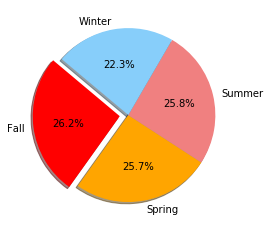

In [144]:
# Labels for the sections of our pie chart
labels = ["Fall", "Spring", "Summer", "Winter"]
# The values of each section of the pie chart
sizes = [(season_rider['Fall'], season_rider['Spring'], season_rider['Summer'],season_rider['Winter'])]
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [100]:
# total yearly ridership according to diff route
route_rider =ridership_df.groupby(['Route']).sum()['Ridership']
route_rider

Route
Blue Line      1.834756e+07
Bus            8.647179e+07
Green Line     4.135930e+07
Orange Line    5.183919e+07
Red Line       6.211576e+07
Silver Line    9.032315e+06
Name: Ridership, dtype: float64

In [19]:
ridership_df['Route'].unique()

array(['Bus', 'Silver Line', 'Blue Line', 'Green Line', 'Orange Line',
       'Red Line'], dtype=object)

In [107]:
#withdraw routes data
ridership = ridership_df.set_index('Date')
ridership

,Mode,Ridership,Route,Season
Date,,,,
2018-01-01,Bus,6.788939e+06,Bus,Winter
2018-01-01,Bus,6.351820e+05,Silver Line,Winter
2018-01-01,Rail,1.323204e+06,Blue Line,Winter
2018-01-01,Rail,3.141136e+06,Green Line,Winter
2018-01-01,Rail,3.987313e+06,Orange Line,Winter
...,...,...,...,...
2018-12-01,Bus,6.716490e+05,Silver Line,Winter
2018-12-01,Rail,1.303504e+06,Blue Line,Winter
2018-12-01,Rail,2.791420e+06,Green Line,Winter


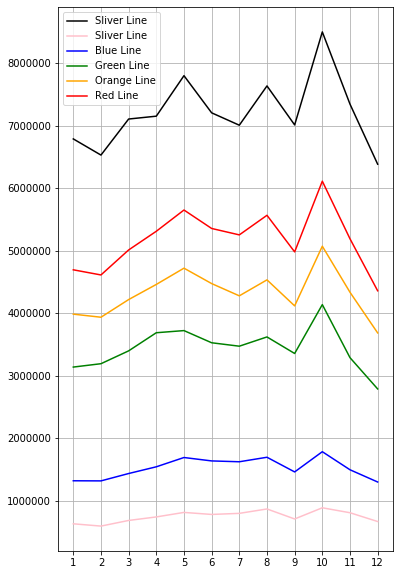

In [108]:
#collect bus data
bus_data = ridership[ridership['Route'] == 'Bus']['Ridership']
silver_data = ridership[ridership['Route'] == 'Silver Line']['Ridership']
blue_data =ridership[ridership['Route'] == 'Blue Line']['Ridership']
green_data =ridership[ridership['Route'] == 'Green Line']['Ridership']
orange_data =ridership[ridership['Route'] == 'Orange Line']['Ridership']
red_data =ridership[ridership['Route'] == 'Red Line']['Ridership']

months = range(1,13)
#months
# Plot different line chart

#plt.plot(months, bus_data, color="black", label="Bus" )
bus, = plt.plot(months,bus_data, color="Black", label="Sliver Line")
silver, = plt.plot(months,silver_data, color="Pink", label="Sliver Line")
blue, = plt.plot(months,blue_data, color="blue", label="Blue Line")
green, = plt.plot(months,green_data, color="green", label="Green Line")
orange, = plt.plot(months,orange_data, color="orange", label="Orange Line")
red, = plt.plot(months,red_data, color="red", label="Red Line")
plt.xticks(months)
plt.rcParams["figure.figsize"] =[6,10]
plt.legend(loc="best")
plt.grid()
plt.show()

In [124]:
#use weather data again, covert 'Date' to data type
weather_file.dtypes
weather_file['Date'] = weather_file['Date'].astype('datetime64[ns]')

grouped = weather_file.groupby(weather_file['Date'].dt.strftime('%B')).agg({'Average Wind Speed':'mean', 'Precipitation': 'mean', 
                                            'Snow':'mean','Average Temperate':'mean'})

#how to calculate an individual column
#average_rain =weather_file.groupby(weather_file['Date'].dt.strftime('%B'))['Precipitation'].mean().sort_values()

grouped_weather = grouped.reset_index()
#grouped_weather['Session'] = np.where(grouped_weather['Date'].isin(['June','July','August']),'Summer',
                             #np.where(grouped_weather['Date'].isin(['September','October','November']),'Fall',
                             #np.where(grouped_weather['Date'].isin(['December','January','February']),'Winter','Spring'
                              #       )))
    
grouped_weather['Date'] = pd.Categorical(grouped_weather['Date'], categories=Date, ordered=True)
grouped_weather =grouped_weather.sort_values('Date') 
#grouped_weather = grouped_weather.set_index('Date')
grouped_weather =grouped_weather.set_index('Date')
grouped_weather

,Average Wind Speed,Precipitation,Snow,Average Temperate
Date,,,,
January,13.327742,0.158710,0.574194,28.580645
February,11.081071,0.134643,0.296429,38.107143
March,15.089032,0.163548,0.751613,36.741935
April,11.938333,0.154000,0.043333,44.700000
May,10.001613,0.061290,0.000000,60.870968
June,10.253333,0.098667,0.000000,67.366667
July,9.870968,0.146774,0.000000,75.870968
August,9.466129,0.150000,0.000000,76.935484
September,9.656333,0.170667,0.000000,68.366667


In [125]:

#grouped_weather['Average Wind Speed'] = grouped_weather['Average Wind Speed'].astype('datetime64[ns]')
#grouped_weather['Precipitation'] = grouped_weather['Precipitation'].astype('datetime64[ns]')
#grouped_weather['Snow'] = grouped_weather['Snow'].astype('datetime64[ns]')
#grouped_weather['Average Temperate'] = grouped_weather['Average Temperate'].astype('datetime64[ns]')
#grouped_weather.dtypes

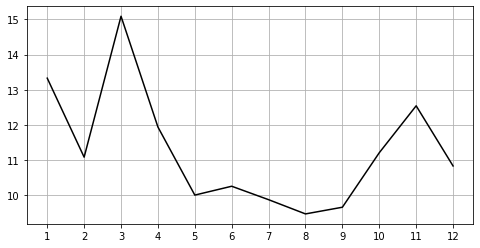

In [146]:
#collect weather data
wind_data = grouped_weather['Average Wind Speed']
rain_data = grouped_weather['Precipitation']
snow_data =grouped_weather['Snow']
tem_data =grouped_weather['Average Temperate']

months = range(1,13)

#wind_data
wind =plt.plot(months,wind_data, color="Black", label="Wind")
plt.xticks(months)
plt.grid()
plt.show()

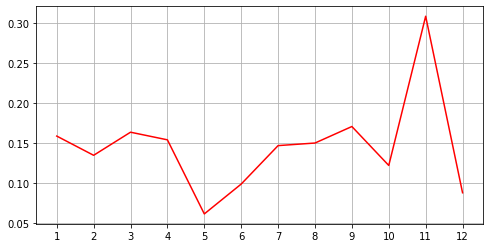

In [147]:
rain =plt.plot(months,rain_data, color="Red", label="Rain")
plt.xticks(months)
plt.grid()
plt.show()

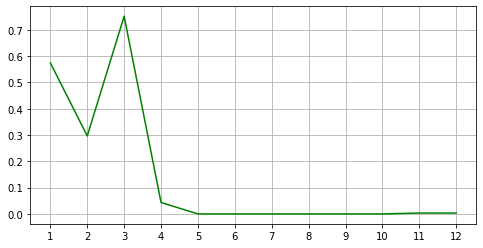

In [148]:
snow =plt.plot(months,snow_data, color="Green", label="Snow")
plt.xticks(months)
plt.grid()
plt.show()

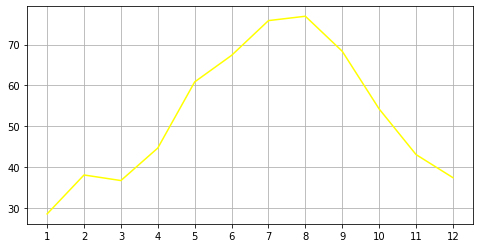

In [149]:
temp =plt.plot(months,tem_data, color="Yellow", label="Temperature")
plt.xticks(months)
plt.grid()
plt.show()